Tabela de Resultados:
   random_state  k  acurácia
0            42  3  0.740741
1            42  5  0.740741
2            17  3  0.648148
3            17  5  0.666667
4            24  3  0.740741
5            24  5  0.666667


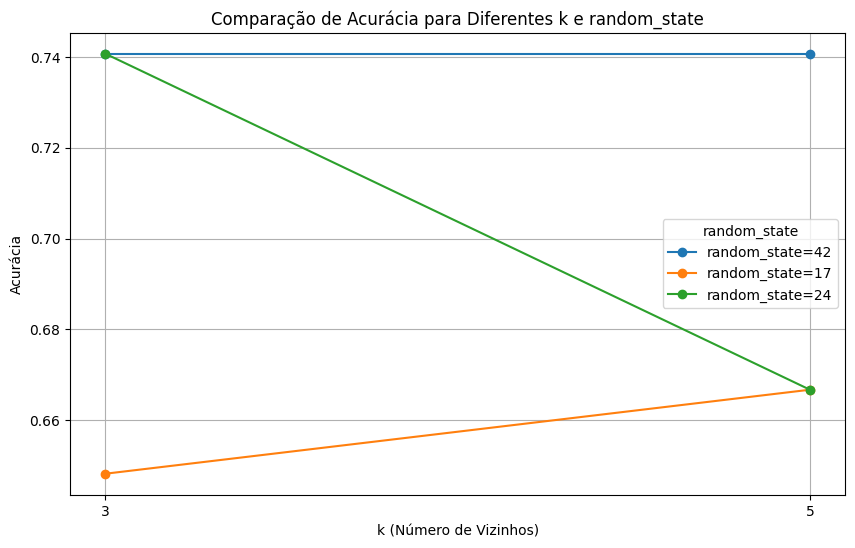


Melhor configuração para cada random_state:
random_state=42 -> Melhor k=3 com Acurácia: 0.7407
random_state=17 -> Melhor k=5 com Acurácia: 0.6667
random_state=24 -> Melhor k=3 com Acurácia: 0.7407


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Carregar os dados
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Função para dividir dados, treinar o modelo KNN e avaliar
def treinar_e_avaliar(random_state, k_values):
    resultados = []

    # Dividir os dados em treino e teste
    X = vinhos.drop('classe', axis=1)  # Features
    y = vinhos['classe']  # Target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Testar diferentes valores de k
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)  # Treinamento
        y_pred = model.predict(X_test)  # Previsão

        accuracy = accuracy_score(y_test, y_pred)  # Acurácia
        resultados.append((k, accuracy))

    return resultados

# Valores de k a serem testados
k_values = [3, 5]

# Resultados para cada random_state
random_states = [42, 17, 24]

todos_resultados = {}

# Realizando os experimentos para diferentes random_state
for random_state in random_states:
    resultados = treinar_e_avaliar(random_state, k_values)
    todos_resultados[random_state] = resultados

# Criar DataFrame para exibir resultados
tabela_resultados = pd.DataFrame(
    [(random_state, k, acc) for random_state, resultados in todos_resultados.items() for k, acc in resultados],
    columns=['random_state', 'k', 'acurácia']
)

# Exibir a tabela de resultados
print("Tabela de Resultados:")
print(tabela_resultados)

# Gráfico de comparação entre k=3 e k=5 para diferentes random_states
fig, ax = plt.subplots(figsize=(10, 6))

for random_state in random_states:
    subset = tabela_resultados[tabela_resultados['random_state'] == random_state]
    ax.plot(subset['k'], subset['acurácia'], label=f'random_state={random_state}', marker='o')

ax.set_title('Comparação de Acurácia para Diferentes k e random_state')
ax.set_xlabel('k (Número de Vizinhos)')
ax.set_ylabel('Acurácia')
ax.legend(title='random_state')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Análise Comparativa Final
# Considerando os melhores desempenhos para cada configuração de random_state
melhor_resultado = {}
for random_state, resultados in todos_resultados.items():
    melhor_k = max(resultados, key=lambda x: x[1])
    melhor_resultado[random_state] = melhor_k

print("\nMelhor configuração para cada random_state:")
for random_state, (k, accuracy) in melhor_resultado.items():
    print(f"random_state={random_state} -> Melhor k={k} com Acurácia: {accuracy:.4f}")

